<a href="https://colab.research.google.com/github/cindewarno/Asignmen1bigdata/blob/main/Cinde_Stroke_non_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Asignment 1 Big Data

---
Title : Stroke Pedriction - non SPARK Engine<br>
Nama : Cinde Warno<br>
Nik  : 2502481056


---


In [ ]:
# Step 1: Import library
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
# Step 2: Load data dari GitHub
url = "https://raw.githubusercontent.com/cindewarno/Asignmen1bigdata/bfe735f69e7f8827c48119f5e81a9ff30323d8f6/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Step 3: Preprocessing
df = df.dropna(subset=["bmi"])
df = df[df["smoking_status"] != "Unknown"]
df = df.drop(columns=["id"])

X = df.drop("stroke", axis=1)
y = df["stroke"]

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Oversampling minority class
from sklearn.utils import resample
X_0 = X_scaled[y == 0]
X_1 = X_scaled[y == 1]
y_0 = y[y == 0]
y_1 = y[y == 1]

X_1_oversampled, y_1_oversampled = resample(X_1, y_1, replace=True, n_samples=len(y_0), random_state=42)
X_balanced = np.vstack((X_0, X_1_oversampled))
y_balanced = np.hstack((y_0, y_1_oversampled))

In [ ]:
# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Train models & measure time
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC AUC": auc,
        "Training Time (s)": end - start
    })

df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  F1 Score   ROC AUC  Training Time (s)
0  Logistic Regression  0.751347  0.758414  0.834909           0.024668
1        Random Forest  0.996151  0.996097  1.000000           0.464954
2                  SVM  0.827560  0.833581  0.901728           5.414470


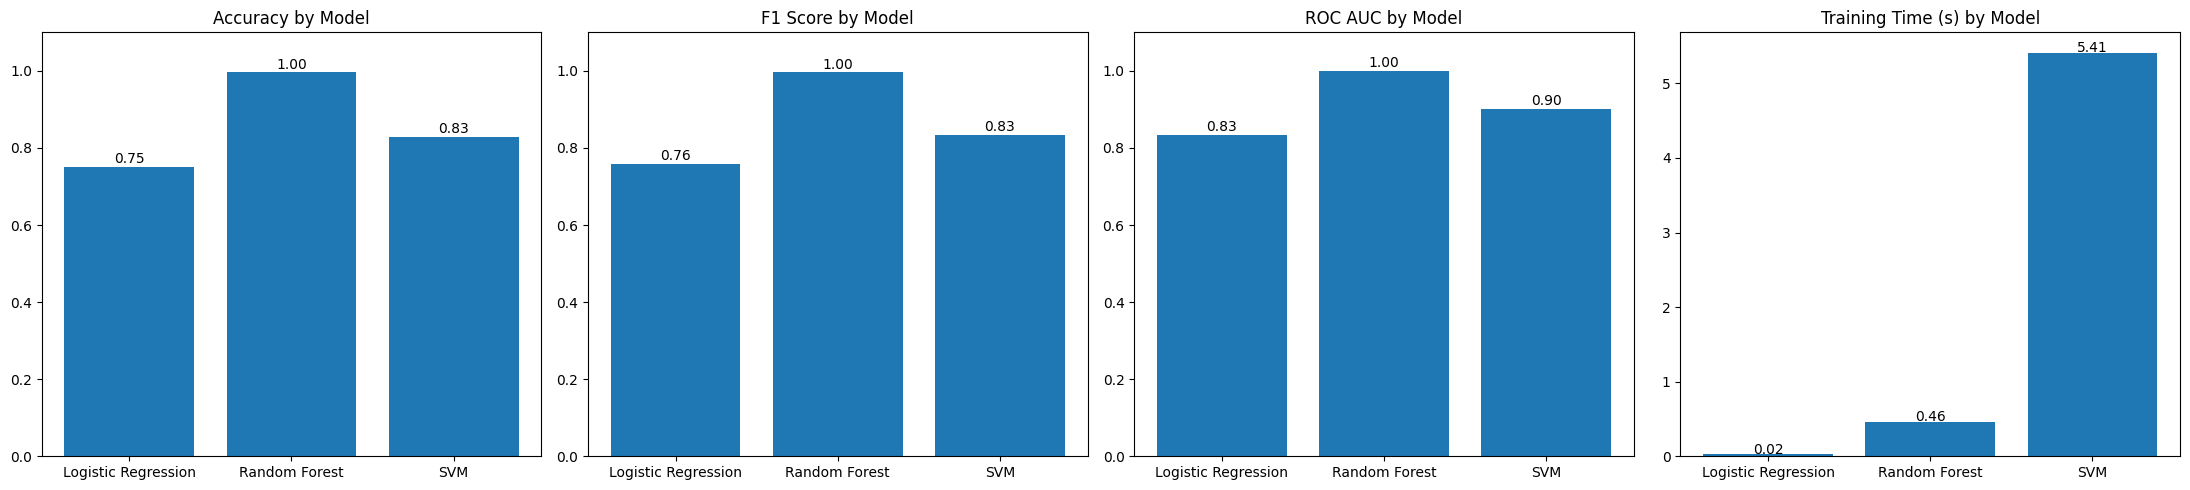

In [ ]:
# Grafik Evaluasi
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
metrics = ["Accuracy", "F1 Score", "ROC AUC", "Training Time (s)"]

for i, metric in enumerate(metrics):
    axes[i].bar(df_results["Model"], df_results[metric])
    axes[i].set_title(f"{metric} by Model")
    axes[i].set_ylim(0, 1.1 if metric != "Training Time (s)" else None)
    for j, val in enumerate(df_results[metric]):
        axes[i].text(j, val + 0.01, f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()